In [1]:
library(tidyverse)
library(egg)
library(lubridate)
library(hms)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: gridExtra




Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘hms’




The following object is masked from ‘package:lubridate’:

    hms




### Prepare and Process Data
In my case, I want to focus on only Daily Activities, HourlySteps and HourlyCalories dataset, since these three metrics contain a full dataset for two months.
I have done data cleaning in SQL, by merging the data from two months, and removing the duplicates.

In [2]:
dailyActivities <- read_csv("/kaggle/input/googlecapstone/CleanedDailyActivities.csv")
hourlyCalories <- read_csv("/kaggle/input/googlecapstone/CleanedHourlyCalories.csv")
hourlySteps <- read_csv("/kaggle/input/googlecapstone/CleanedHourlySteps.csv")

Rows: 1373 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesD...
date  (1): ActivityDate



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 46008 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): Id, Calories
dttm (1): ActivityHour



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 46008 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): Id, StepTotal
dttm (1): ActivityHour



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Now take a glimpse on the three dataframe
glimpse(dailyActivities)
glimpse(hourlyCalories)
glimpse(hourlySteps)

Rows: 1,373
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-03-25, 2016-03-26, 2016-03-27, 2016-03-…
$ TotalSteps               <dbl> 11004, 17609, 12736, 13231, 12041, 10970, 122…
$ TotalDistance            <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ TrackerDistance          <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 2.57, 6.92, 4.66, 3.19, 2.16, 2.36, 2.29, 3.3…
$ ModeratelyActiveDistance <dbl> 0.46, 0.73, 0.16, 0.79, 1.09, 0.51, 0.49, 0.8…
$ LightActiveDistance      <dbl> 4.07, 3.91, 3.71, 4.95, 4.61, 4.29, 5.04, 3.6…
$ SedentaryActiveDistance  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ VeryActiveMinutes        <dbl> 33, 89, 56, 39, 28, 30, 33, 47, 40, 15, 43, 3…
$ FairlyActiveMinutes      <dbl> 12, 17, 5, 20, 28, 13, 12, 21, 11, 30, 18, 18…
$ LightlyActiveM

Rows: 46,008
Columns: 3
$ Id           <dbl> 3372868164, 4319703577, 1644430081, 1644430081, 184450507…
$ ActivityHour <dttm> 2016-04-04 02:00:00, 2016-04-08 06:00:00, 2016-04-16 20:…
$ Calories     <dbl> 59, 61, 160, 105, 56, 108, 61, 71, 76, 70, 56, 76, 84, 62…


Rows: 46,008
Columns: 3
$ Id           <dbl> 1624580081, 2026352035, 4558609924, 6117666160, 879200966…
$ ActivityHour <dttm> 2016-03-20 00:00:00, 2016-03-22 21:00:00, 2016-04-08 13:…
$ StepTotal    <dbl> 0, 51, 405, 440, 0, 0, 0, 6, 0, 0, 0, 410, 0, 0, 584, 592…


In [4]:
# Add a only date column to hourlyCalories and hourlySteps
hourlyCalories <- hourlyCalories %>% 
  mutate(Date = as.Date(ActivityHour, format = "%Y-%m-%d %H:%M:%S", tz=Sys.timezone()))
hourlySteps <- hourlySteps %>% 
  mutate(Date = as.Date(ActivityHour, format = "%Y-%m-%d %H:%M:%S", tz=Sys.timezone()))

In [5]:
head(hourlyCalories)
head(hourlySteps)

Id,ActivityHour,Calories,Date
<dbl>,<dttm>,<dbl>,<date>
3372868164,2016-04-04 02:00:00,59,2016-04-04
4319703577,2016-04-08 06:00:00,61,2016-04-08
1644430081,2016-04-16 20:00:00,160,2016-04-16
1644430081,2016-04-18 15:00:00,105,2016-04-18
1844505072,2016-03-16 03:00:00,56,2016-03-16
4319703577,2016-03-31 08:00:00,108,2016-03-31


Id,ActivityHour,StepTotal,Date
<dbl>,<dttm>,<dbl>,<date>
1624580081,2016-03-20 00:00:00,0,2016-03-20
2026352035,2016-03-22 21:00:00,51,2016-03-22
4558609924,2016-04-08 13:00:00,405,2016-04-08
6117666160,2016-03-26 09:00:00,440,2016-03-26
8792009665,2016-03-18 14:00:00,0,2016-03-18
1844505072,2016-04-22 01:00:00,0,2016-04-22


### Analyze Data

#### Part 1 - Segmentation of customers
To have more efficient marketing on target customers, customers in samples are grouped or segmented using their mean daily steps, for their lifestyle.
Other than mean daily steps, mean daily calories burnt are computed as well.

In [6]:
# Calculate mean daily steps and mean daily calories burnt for each customer
dailyAverage <- dailyActivities %>%
  group_by(Id) %>% 
  summarise(meanDailySteps = mean(TotalSteps), meanCalories = mean(Calories))
# Segmented the customers by the mean daily steps
# According to Sedentary Lifestyle Index developed by Professor Catrine Tudor-Locke
dailyAverage <- dailyAverage %>%
  mutate(lifestyle = case_when(
    meanDailySteps < 5000 ~ "sedentary",
    meanDailySteps >= 5000 & meanDailySteps < 7499 ~ "low active", 
    meanDailySteps >= 7500 ~ "physically active"
  ))

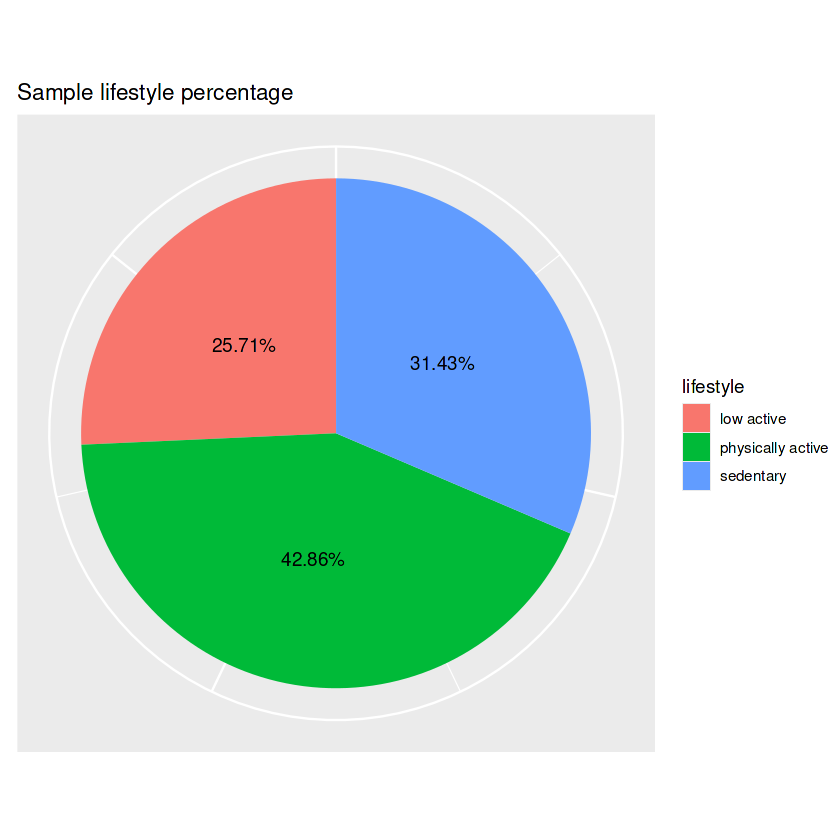

In [7]:
# Determine lifestyle count percentage among samples
# And do a piechart to visualize it
lifestyleCount <- dailyAverage %>%
  group_by(lifestyle) %>% 
  summarise(Count = n(), proportion = round(n()/35,4) )
ggplot(data= lifestyleCount, aes(x = "", y = Count, fill = lifestyle)) +
  geom_col() +
  geom_text(aes(label = paste0(proportion*100,"%")),
            position = position_stack(vjust = 0.5))+
  coord_polar(theta = "y")+
  labs(title="Sample lifestyle percentage")+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank())

The data suggests that physically active person tends to use smart wearable devices, compared to the other two lifstyles person. The target customer of this fitness tracker may focus more on physically active person. Company can try to do more marketing or advertisement in gym/sport centre, which has more physically active person, to attract more customers.

#### Part 2 - Correlation between meanDailySteps and meanCalories


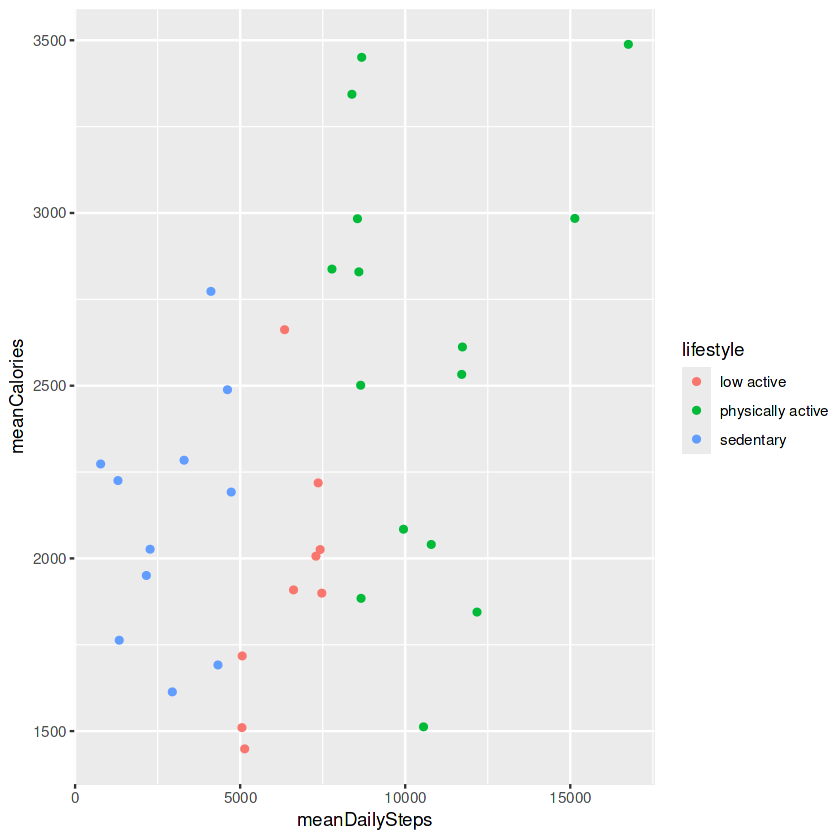

In [8]:
# Determine relationship of meanDailySteps vs meanCalories
ggplot(data=dailyAverage)+
  geom_point(mapping=aes(x= meanDailySteps, y= meanCalories, color = lifestyle))

The chart shows that meanCalories and meanDailySteps is not correlated strongly. However, it can be noted that only physically active person burnt more than 2800 calories daily in average, even though the meanDailySteps may not be the highest. This suggests that calories burnt may be caused by other more vigourous or more active activities.

#### Part 3 - Days of the weeks analyses

It would be interested to discover any pattern or trend when customer wear their fitness tracker in a week.

In [9]:
# Create a new table for the count of wearing, daily steps and daily calories, daily sendentary min burnt for each day of the week.
dailyActivities <- dailyActivities %>% 
  mutate(weekday = weekdays(ActivityDate))
weekdayAverage <- dailyActivities %>%
  mutate(weekday = weekdays(ActivityDate))
weekdayAverage$weekday <- ordered(weekdayAverage$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
weekdayAverage <- weekdayAverage %>%
  group_by(weekday) %>% 
  summarise(countofuse = n(), meanSteps = mean(TotalSteps), meanSedentaryMin = mean(SedentaryMinutes), meanCaloriesBurnt= mean(Calories))
weekdayAverage

weekday,countofuse,meanSteps,meanSedentaryMin,meanCaloriesBurnt
<ord>,<int>,<dbl>,<dbl>,<dbl>
Monday,188,7541.319,1029.7181,2298.404
Tuesday,201,7718.960,1012.2090,2338.881
Wednesday,198,7547.576,994.7121,2320.763
Thursday,195,7268.297,984.9026,2223.754
Friday,199,7187.533,1020.2663,2325.095
Saturday,199,7752.271,968.9347,2325.804
Sunday,193,6606.725,999.7306,2227.409


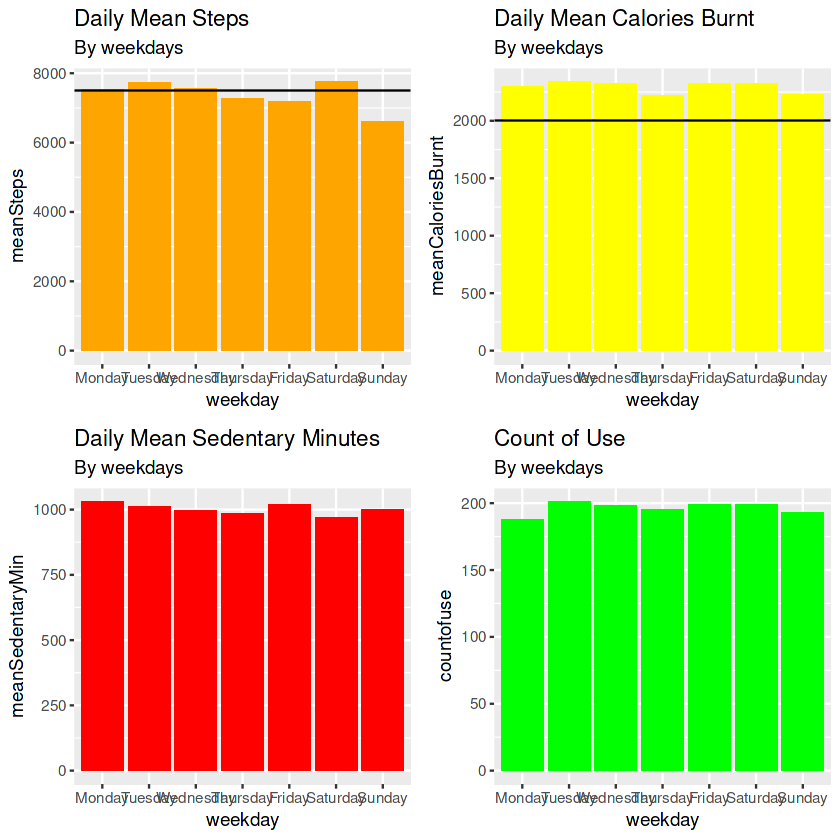

In [10]:
# Create plots for the mean metrics.
StepsbyWeekDays <-
  ggplot(data=weekdayAverage)+
  geom_col(mapping=aes(x= weekday, y= meanSteps), fill = "orange")+
  labs(title="Daily Mean Steps", subtitle =  "By weekdays")+
  geom_hline(yintercept = 7500)

SedentaryMinbyWeekDays <-
ggplot(data=weekdayAverage)+
  geom_col(mapping=aes(x= weekday, y= meanSedentaryMin), fill = "red")+
  labs(title="Daily Mean Sedentary Minutes", subtitle =  "By weekdays")

CaloriesBurntbyWeekDays <- 
  ggplot(data=weekdayAverage)+
  geom_col(mapping=aes(x= weekday, y= meanCaloriesBurnt), fill = "yellow")+
  labs(title="Daily Mean Calories Burnt", subtitle =  "By weekdays")+
  geom_hline(yintercept = 2000)

CountofUsebyWeekDays <-
  ggplot(data=weekdayAverage)+
  geom_col(mapping=aes(x= weekday, y= countofuse), fill = "green")+
  labs(title="Count of Use", subtitle =  "By weekdays")

ggarrange(StepsbyWeekDays, CaloriesBurntbyWeekDays, SedentaryMinbyWeekDays, CountofUsebyWeekDays, nrow =2)

There is no specific pattern for Count of Use, Mean Sedentary Minutes, and Mean Calories Burnt by days of the week. As for case of Daily Mean Steps, it can be clearly observed that, daily mean steps for Sunday (6606 steps) is particularly lower than the other days and still far away from the suggested daily steps (7500). Rewards may be given to customer who walked more on Sunday to improve this situation. Meanwhile, in a week, customers have not enough walking in 3 days (Thurs, Fri and Sun), in average. However, for all days in the week, the mean Daily Calories Burnt for each day exceed 2000 calories. Note that 2000 calories is just a broad threshold by ignoring all the demographic variable. 
To improve the mean steps walked each day, the company may come out with a 'ranking' system in the app, according to the daily steps, to stimulate some good competition mind among the users, thus walk more every day.

#### Part 4 - Time of Days analyses
By analyzing which time frame customers tends to walk and exercise more, app can customize a better notification according to the each customer habits. I first go for time analyses for all customers, then only go for individual.

In [11]:
# Create two new column Time and session for hourlyCalories and hourlySteps
hourlyCalories <- hourlyCalories %>% 
  mutate(Hour = as_hms(ActivityHour))
hourlyCalories <- hourlyCalories %>% 
  mutate(session= case_when(
    Hour >= as_hms("06:00:00") & Hour < as_hms("10:00:00") ~ "Morning",
    Hour >= as_hms("10:00:00") & Hour < as_hms("13:00:00") ~ "Noon",
    Hour >= as_hms("13:00:00") & Hour < as_hms("17:00:00") ~ "Afternoon",
    Hour >= as_hms("17:00:00") & Hour < as_hms("20:00:00") ~ "Evening",
    Hour >= as_hms("20:00:00") | Hour < as_hms("06:00:00") ~ "Night"
  ))
hourlySteps <- hourlySteps %>% 
  mutate(Hour = as_hms(ActivityHour))
hourlySteps <- hourlySteps %>% 
  mutate(session = case_when(
    Hour >= as_hms("06:00:00") & Hour < as_hms("10:00:00") ~ "Morning",
    Hour >= as_hms("10:00:00") & Hour < as_hms("13:00:00") ~ "Noon",
    Hour >= as_hms("13:00:00") & Hour < as_hms("17:00:00") ~ "Afternoon",
    Hour >= as_hms("17:00:00") & Hour < as_hms("20:00:00") ~ "Evening",
    Hour >= as_hms("20:00:00") | Hour < as_hms("06:00:00") ~ "Night"
  ))
head(hourlyCalories)
head(hourlySteps)

Id,ActivityHour,Calories,Date,Hour,session
<dbl>,<dttm>,<dbl>,<date>,<time>,<chr>
3372868164,2016-04-04 02:00:00,59,2016-04-04,02:00:00,Night
4319703577,2016-04-08 06:00:00,61,2016-04-08,06:00:00,Morning
1644430081,2016-04-16 20:00:00,160,2016-04-16,20:00:00,Night
1644430081,2016-04-18 15:00:00,105,2016-04-18,15:00:00,Afternoon
1844505072,2016-03-16 03:00:00,56,2016-03-16,03:00:00,Night
4319703577,2016-03-31 08:00:00,108,2016-03-31,08:00:00,Morning


Id,ActivityHour,StepTotal,Date,Hour,session
<dbl>,<dttm>,<dbl>,<date>,<time>,<chr>
1624580081,2016-03-20 00:00:00,0,2016-03-20,00:00:00,Night
2026352035,2016-03-22 21:00:00,51,2016-03-22,21:00:00,Night
4558609924,2016-04-08 13:00:00,405,2016-04-08,13:00:00,Afternoon
6117666160,2016-03-26 09:00:00,440,2016-03-26,09:00:00,Morning
8792009665,2016-03-18 14:00:00,0,2016-03-18,14:00:00,Afternoon
1844505072,2016-04-22 01:00:00,0,2016-04-22,01:00:00,Night


In [12]:
# Summarize data computing mean steps and calories for hours
MeanHourlySteps <- hourlySteps %>%
  group_by(Hour) %>%
  summarize(MeanSteps = mean(StepTotal))
MeanHourlyCalories <- hourlyCalories %>%
  group_by(Hour) %>%
  summarize(MeanCalories = mean(Calories))
head(MeanHourlySteps)
head(MeanHourlyCalories)

Hour,MeanSteps
<time>,<dbl>
00:00:00,43.361240
01:00:00,21.884178
02:00:00,13.694416
03:00:00,6.850491
04:00:00,11.108752
05:00:00,34.926463


Hour,MeanCalories
<time>,<dbl>
00:00:00,72.17054
01:00:00,69.91572
02:00:00,68.65202
03:00:00,67.55872
04:00:00,68.00880
05:00:00,79.61574


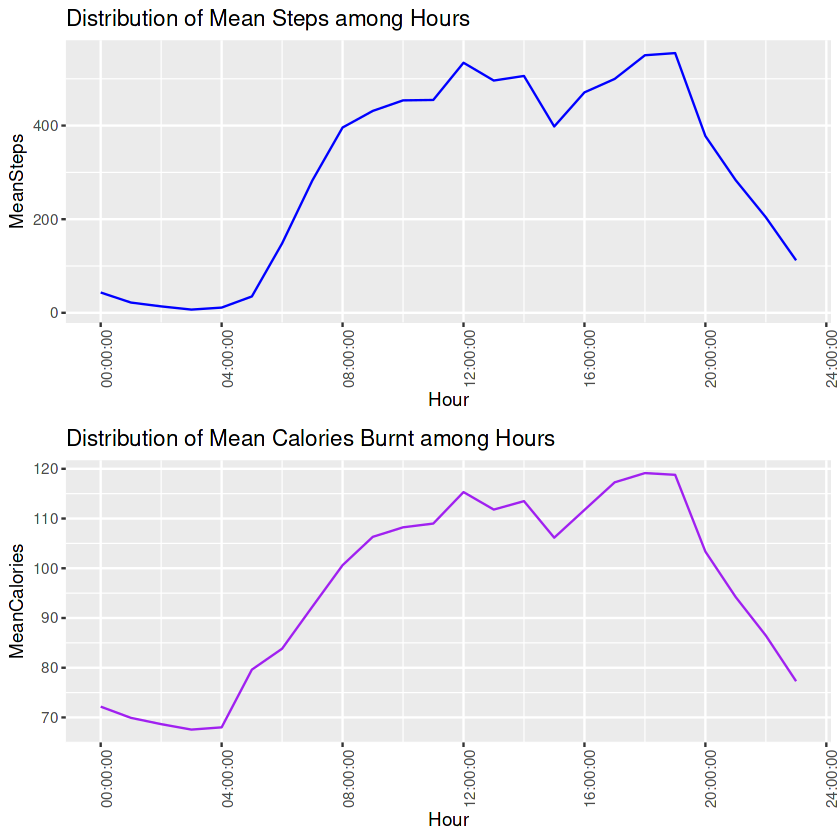

In [13]:
# Computing plots
ggarrange(
ggplot(data=MeanHourlySteps)+
  geom_line(mapping=aes(x= Hour, y= MeanSteps), color= "blue")+
  labs(title="Distribution of Mean Steps among Hours")+
  theme(axis.text.x = element_text(angle = 90)),

ggplot(data=MeanHourlyCalories)+
  geom_line(mapping=aes(x= Hour, y= MeanCalories), color= "purple")+
  labs(title="Distribution of Mean Calories Burnt among Hours")+
  theme(axis.text.x = element_text(angle = 90)), nrow = 2)

From the plots, it can be observed that customer walked most and also burnt most calories at 7pm, then followed by 6pm then 12pm. This may due to some reasons:
1) Customer have the lunch break at 12pm hence walk more
2) Customer exercise or take strolling after work.

Now we will analyse on individual data, by returning the session which they walk most. Before this, session and hourly step for each Id is computed.

In [14]:
#Computing hourly step for each Id
IndHourlySteps <- hourlySteps %>%
  group_by(Id, Hour) %>%
  summarize(averageSteps = mean(StepTotal)) %>%  # Calculate hourly sum
  group_by(Id) %>%  # Group by Id to calculate percentages
  mutate(percentage = (averageSteps / sum(averageSteps)) * 100)
#Compute session step
SessionSteps <- hourlySteps %>%
  group_by(Id, session) %>%
  summarize(averageSteps = mean(StepTotal)) %>%  # Calculate session sum
  group_by(Id) %>%  # Group by Id to calculate percentages
  mutate(percentage = (averageSteps / sum(averageSteps)) * 100)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


In [15]:
head(IndHourlySteps)
head(SessionSteps)

Id,Hour,averageSteps,percentage
<dbl>,<time>,<dbl>,<dbl>
1503960366,00:00:00,131.622951,1.02335462
1503960366,01:00:00,44.114754,0.34298758
1503960366,02:00:00,34.622951,0.26918981
1503960366,03:00:00,15.262295,0.11866274
1503960366,04:00:00,2.000000,0.01554979
1503960366,05:00:00,2.032787,0.01580470


Id,session,averageSteps,percentage
<dbl>,<chr>,<dbl>,<dbl>
1503960366,Afternoon,680.1557,22.42145
1503960366,Evening,1003.8306,33.09144
1503960366,Morning,356.8320,11.76303
1503960366,Night,385.9819,12.72396
1503960366,Noon,606.7049,20.00013
1624580081,Afternoon,238.2551,17.91200


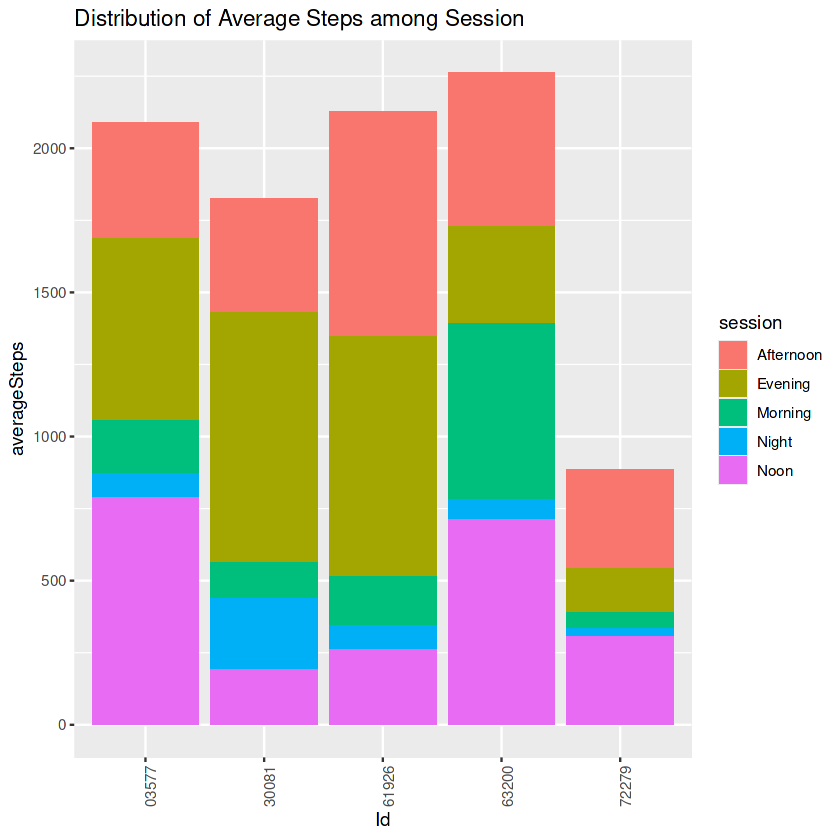

In [16]:
# Show the result in ggplot by picking only 5 Ids
FilterSessionSteps <- SessionSteps %>%
  filter(Id %in% c("7086361926", "1644430081", "8378563200", "1927972279", "4319703577")) %>% 
  mutate(Id = substr(Id, 6, 10)) # Display last 4 digit for the Id

  SessionStepsPlot<- ggplot(data=FilterSessionSteps)+
  geom_col(mapping=aes(x= Id, y= averageSteps, fill = session))+
  labs(title="Distribution of Average Steps among Session")+
  theme(axis.text.x = element_text(angle = 90))
SessionStepsPlot

From the result, it can be seen that customer have different situation in the distribution of daily steps. For example, Customer end with 03577 usually walk more in Noon, Customer end with 61926 walk more in the evening. By knowing the customer habits, the reminder can be send to customer according to the session, whenever customer walk lesser than he/she usually did so in the session.

In [17]:
#Compute session calories
SessionCalories <- hourlyCalories %>%
  group_by(Id, session) %>%
  summarize(averageCalories = mean(Calories)) %>% 
  group_by(Id) %>%
  mutate(percentage = (averageCalories / sum(averageCalories)) * 100)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


In [18]:
head(SessionCalories)

Id,session,averageCalories,percentage
<dbl>,<chr>,<dbl>,<dbl>
1503960366,Afternoon,89.93852,21.34844
1503960366,Evening,105.12022,24.95207
1503960366,Morning,68.55738,16.27326
1503960366,Night,70.39374,16.70915
1503960366,Noon,87.27869,20.71708
1624580081,Afternoon,62.20243,19.92518


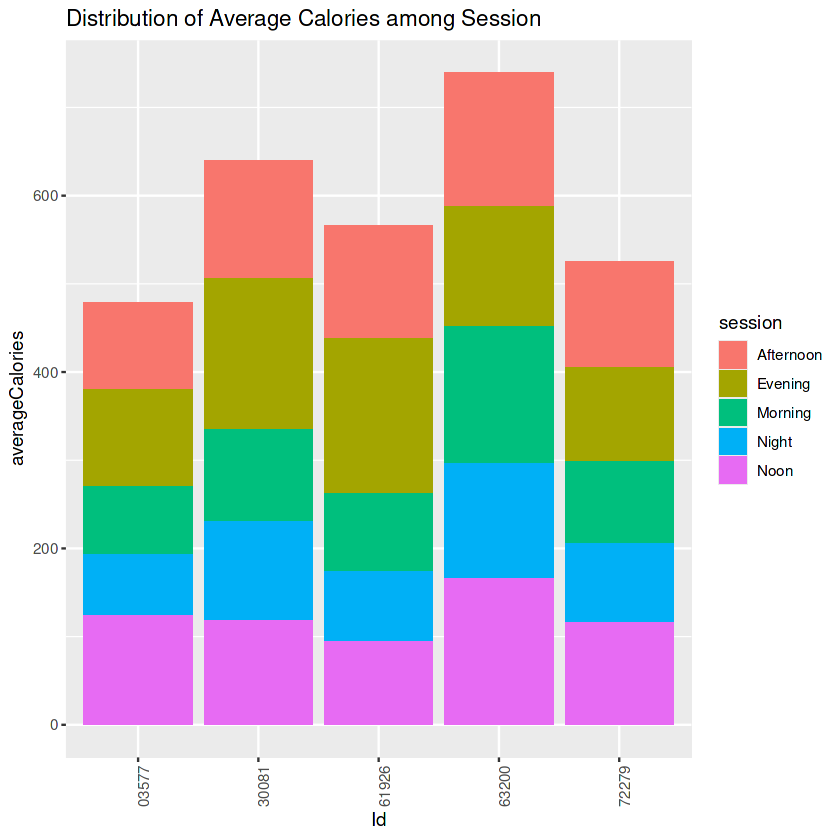

In [19]:
FilterSessionCalories <- SessionCalories %>%
  filter(Id %in% c("7086361926", "1644430081", "8378563200", "1927972279", "4319703577")) %>% 
  mutate(Id = substr(Id, 6, 10)) # Display last 4 digit for the Id
SessionCaloriesPlot <- ggplot(data=FilterSessionCalories)+
geom_col(mapping=aes(x= Id, y= averageCalories, fill = session))+
labs(title="Distribution of Average Calories among Session")+
theme(axis.text.x = element_text(angle = 90))
SessionCaloriesPlot 

An interesting point by comparing average steps and average calories plot is that, even though customer ended with 72279 walk much lesser steps than the other four customer, but the average calories didn't have such big differences as in average steps. Customer ended with 72219 even burnt more calories than customer ended with 03577. This told us that custimer 72279 has a higher intensity walk or exercise than others, hence relatively burnt more calories.

### Conclusion
From the data, we have found some patterns that may help to improve fitness tracker and the app.
1. Physically active person tend to become potential customer of fitness tracker. More marketing or advertisement can be aimed towards sports platform such as sport live website, consider to advertise on sport carnival.
2. Customer tends to walk least on Sunday. Company may have more online campaign like 'Sundays Streak' to encourage more walking on Weekend or Work off day, to maintain customer's health. Besides, to improve the steps walked each day, the company may rank the user's steps every day and giving rewards correspondingly.
3. Consider to customize reminder for different customers, when the customers walk lesser than he/she usually did. The reminder can be sent during the session he/she usually walked the most, to have the most accurate timing, then be the most efficient reminder.